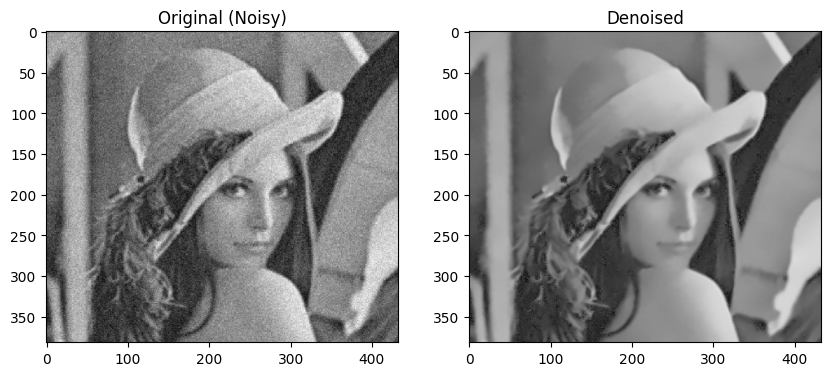

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image with noise
image = cv2.imread('/content/Screenshot 2025-04-22 104809.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Denoising using fastNlMeansDenoisingColored
denoised_image = cv2.fastNlMeansDenoisingColored(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), None, 10, 10, 7, 21) #no local mens denoising

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image), plt.title("Original (Noisy)")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)), plt.title("Denoised")
plt.show()


In [1]:
from google.colab import files
import os

upload_folder = "/content/Pan_Images"
os.makedirs(upload_folder, exist_ok=True)

uploaded = files.upload()

for filename in uploaded.keys():
    os.rename(filename, os.path.join(upload_folder, filename))

Saving Screenshot 2025-04-22 110939.png to Screenshot 2025-04-22 110939.png
Saving Screenshot 2025-04-22 110956.png to Screenshot 2025-04-22 110956.png


[INFO] Loading images...
[INFO] Stitching images...
[INFO] Stitching successful.


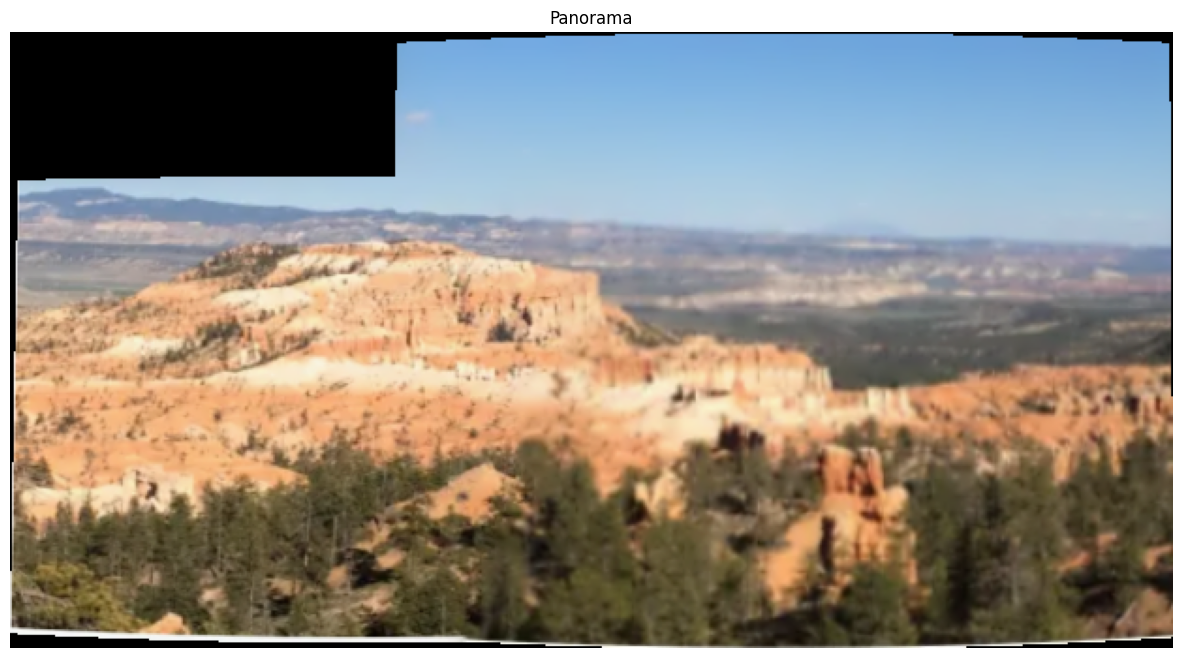

In [2]:
!pip install imutils
# Import packages
from imutils import paths
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Update this to your image folder path inside Colab or upload images
image_folder = "/content/Pan_Images"  # Replace with your folder path
output_path = "/content/stitched_output.jpg"

# Create list of image paths
imagePaths = sorted(list(paths.list_images(image_folder)))
images = []

print("[INFO] Loading images...")
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    if image is not None:
        images.append(image)

# Check if we have enough images
if len(images) < 2:
    print("[ERROR] Need at least 2 images to stitch!")
else:
    print("[INFO] Stitching images...")

    # Create stitcher object
    stitcher = cv2.Stitcher_create() if imutils.is_cv3() else cv2.Stitcher_create()

    # Perform stitching
    status, stitched = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        print("[INFO] Stitching successful.")
        # Save stitched image
        cv2.imwrite(output_path, stitched)

        # Show image using matplotlib
        plt.figure(figsize=(15, 8))
        plt.axis("off")
        plt.title("Panorama")
        plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print(f"[ERROR] Image stitching failed (status code: {status})")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0245 - val_loss: 0.0099
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0064 - val_loss: 0.00

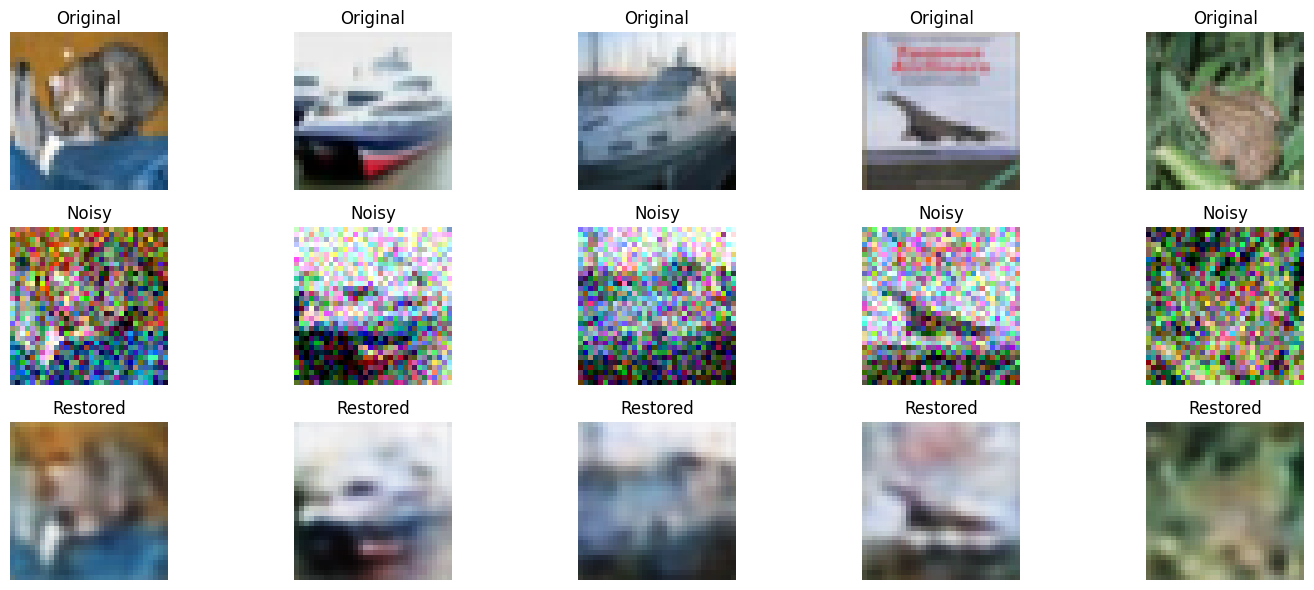

Average PSNR over 100 test images: 22.6338169179756


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from skimage.metrics import peak_signal_noise_ratio as psnr
# Step 1: Load and Normalize CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Step 2: Add Gaussian Noise
def add_noise(data, noise_factor=0.2):
    noisy = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return np.clip(noisy, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Step 3: Build the Autoencoder
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Step 4: Train the Autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Step 5: Predict Restored Images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Step 6: Visualize Results
n = 5
plt.figure(figsize=(15, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    ax.set_title("Original")
    plt.axis("off")

    # Noisy
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i])
    ax.set_title("Noisy")
    plt.axis("off")

    # Restored
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(decoded_imgs[i])
    ax.set_title("Restored")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Step 7: Evaluate with PSNR
psnr_scores = [psnr(x_test[i], decoded_imgs[i]) for i in range(100)]
print("Average PSNR over 100 test images:", np.mean(psnr_scores))

Epoch 1/3 — D Loss: 1.4183, G Loss: 0.7449
Epoch 2/3 — D Loss: 1.6516, G Loss: 0.6653
Epoch 3/3 — D Loss: 1.1951, G Loss: 0.8356
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


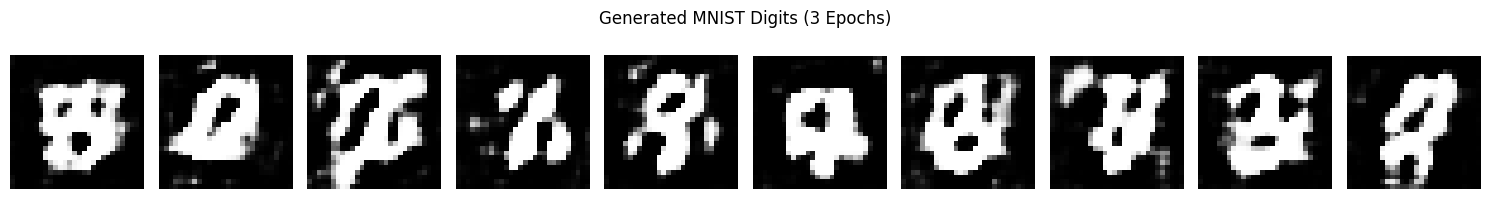

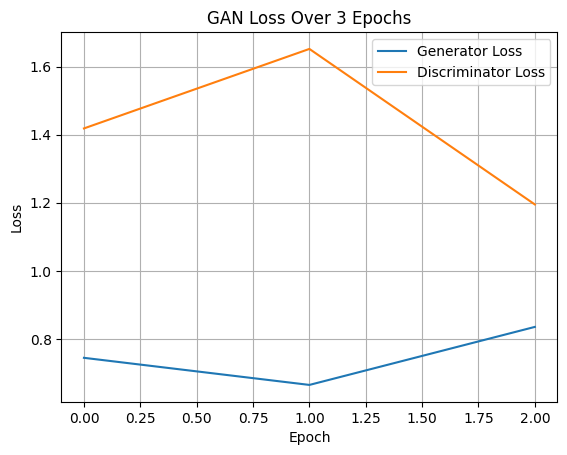

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Fix seed for reproducibility
tf.random.set_seed(42)

# ----------- Load & Preprocess MNIST -----------
(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

# ----------- Build Generator -----------
def build_generator():
    model = models.Sequential([
        layers.Input(shape=(100,)),
        layers.Dense(7 * 7 * 128),
        layers.Reshape((7, 7, 128)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.UpSampling2D(),
        layers.Conv2D(128, kernel_size=3, padding="same"),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.UpSampling2D(),
        layers.Conv2D(1, kernel_size=3, padding="same", activation='tanh')
    ])
    return model

# ----------- Build Discriminator -----------
def build_discriminator():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# ----------- Training Function -----------
def train_gan(dataset, generator, discriminator, epochs=3, batch_size=128):
    cross_entropy = tf.keras.losses.BinaryCrossentropy()
    g_optimizer = tf.keras.optimizers.Adam(1e-4)
    d_optimizer = tf.keras.optimizers.Adam(1e-4)

    g_losses, d_losses = [], []

    for epoch in range(epochs):
        for i in range(0, len(dataset), batch_size):
            real_imgs = dataset[i:i + batch_size]
            batch_len = real_imgs.shape[0]
            noise = tf.random.normal([batch_len, 100])

            with tf.GradientTape() as disc_tape:
                fake_imgs = generator(noise, training=True)
                real_output = discriminator(real_imgs, training=True)
                fake_output = discriminator(fake_imgs, training=True)

                real_loss = cross_entropy(tf.ones_like(real_output), real_output)
                fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
                d_loss = real_loss + fake_loss

            grads_d = disc_tape.gradient(d_loss, discriminator.trainable_variables)
            d_optimizer.apply_gradients(zip(grads_d, discriminator.trainable_variables))

            with tf.GradientTape() as gen_tape:
                fake_imgs = generator(noise, training=True)
                fake_output = discriminator(fake_imgs, training=True)
                g_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

            grads_g = gen_tape.gradient(g_loss, generator.trainable_variables)
            g_optimizer.apply_gradients(zip(grads_g, generator.trainable_variables))

        g_losses.append(g_loss.numpy())
        d_losses.append(d_loss.numpy())
        print(f"Epoch {epoch+1}/{epochs} — D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

    return g_losses, d_losses, generator

# ----------- Visualization Functions -----------
def plot_generated_images(generator):
    noise = tf.random.normal([10, 100])
    gen_imgs = generator.predict(noise)
    gen_imgs = (gen_imgs + 1) / 2.0  # Scale to [0, 1]

    plt.figure(figsize=(15, 2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
        plt.axis("off")
    plt.suptitle("Generated MNIST Digits (3 Epochs)")
    plt.tight_layout()
    plt.show()

def plot_loss_curves(g_losses, d_losses):
    plt.plot(g_losses, label="Generator Loss")
    plt.plot(d_losses, label="Discriminator Loss")
    plt.title("GAN Loss Over 3 Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------- Run Training -----------
generator = build_generator()
discriminator = build_discriminator()

g_losses, d_losses, trained_generator = train_gan(x_train, generator, discriminator, epochs=3)
plot_generated_images(trained_generator)
plot_loss_curves(g_losses, d_losses)



In [ ]:
!pip install --upgrade tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# === Load Dataset ===
# Removed 'version' argument, relying on latest version
dataset, info = tfds.load('oxford_iiit_pet', with_info=True, data_dir='/content/dataset')
train_ds = dataset['train']
test_ds = dataset['test']

# === Constants ===
IMG_SIZE = 128
BATCH_SIZE = 32

# === Preprocessing Function ===
def preprocess(datapoint):
    image = tf.image.resize(datapoint['image'], (IMG_SIZE, IMG_SIZE)) / 255.0
    mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_SIZE, IMG_SIZE))
    # Cast 'mask' to int32 before using tf.where
    mask = tf.cast(mask, tf.int32)
    mask = tf.where(mask == 2, 1, mask)  # merge class 2 into pet class (1)
    return image, tf.cast(mask, tf.uint8)

train = train_ds.map(preprocess).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
def unet_model(input_size=(128, 128, 3)):
    inputs = tf.keras.Input(input_size)

    # Encoder
    c1 = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D()(c1)

    c2 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D()(c2)

    c3 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D()(c3)

    # Bottleneck
    c4 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p3)
    c4 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c4)

    # Decoder
    u1 = tf.keras.layers.UpSampling2D()(c4)
    concat1 = tf.keras.layers.Concatenate()([u1, c3])
    c5 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(concat1)

    u2 = tf.keras.layers.UpSampling2D()(c5)
    concat2 = tf.keras.layers.Concatenate()([u2, c2])
    c6 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(concat2)

    u3 = tf.keras.layers.UpSampling2D()(c6)
    concat3 = tf.keras.layers.Concatenate()([u3, c1])
    c7 = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(concat3)

    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(c7)

    return tf.keras.Model(inputs, outputs)

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 128, 128,  │        448 │ input_layer_13[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 128, 128,  │      2,320 │ conv2d_35[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_36[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_6[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 64, 64,    │      9,248 │ conv2d_37[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_38[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_7[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_39[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 16, 16,    │          0 │ conv2d_40[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 16, 16,    │    147,584 │ conv2d_41[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_16    │ (None, 32, 32,    │          0 │ conv2d_42[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d_16… │
│ (Concatenate)       │ 192)              │            │ conv2d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 32, 32,    │    110,656 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_17    │ (None, 64, 64,    │          0 │ conv2d_43[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64, 64,    │          0 │ up_sampling2d_17

 Total params: 438,801 (1.67 MB)

 Trainable params: 438,801 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/3
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/3
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


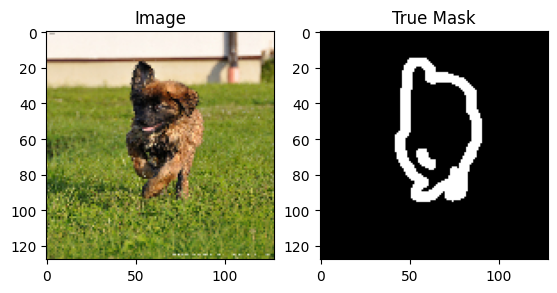

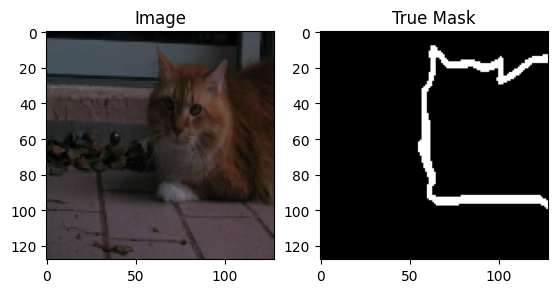

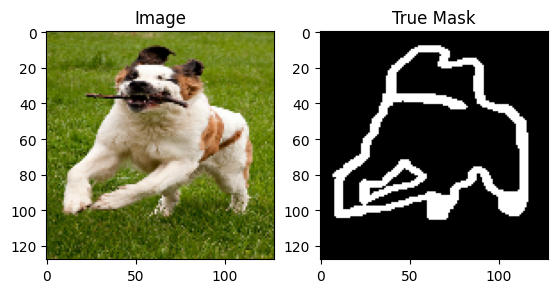

In [ ]:
# === Train Model ===
history = model.fit(train, validation_data=test, epochs=3)

# === Predict Sample Masks ===
def show_sample_predictions(dataset, model, num=3):
    for images, masks in dataset.take(1):
        preds = model.predict(images)
        for i in range(num):
            plt.figure(figsize=(10, 3))
            plt.subplot(1, 3, 1)
            plt.imshow(images[i])
            plt.title("Image")
            plt.subplot(1, 3, 2)
            plt.imshow(tf.squeeze(masks[i]), cmap='gray')
            plt.title("True Mask")



show_sample_predictions(test, model)
